In [40]:
import pandas as pd

df = pd.read_csv('three_col.csv')
df.head()

,income,age,days_since_purchase
0,56432,31,492
1,137580,38,551
2,68285,59,304
3,93617,51,507
4,113441,54,509


## 整理数据，进行数据标准化统一

In [41]:
#获取各列列名
cols=df.columns
#zcols获取新增加的三列列名
zcols=[]
for col in cols:
    df['z_'+col]=(df[col]-df[col].mean())/df[col].std()
    zcols.append('z_'+col)
df.head()

,income,age,days_since_purchase,z_income,z_age,z_days_since_purchase
0,56432,31,492,-0.606833,-0.748848,0.818321
1,137580,38,551,1.505879,-0.135469,1.349109
2,68285,59,304,-0.298237,1.704668,-0.873001
3,93617,51,507,0.361289,1.003663,0.953267
4,113441,54,509,0.877413,1.266540,0.971260


## 查看标准化后数据分布

d:\Anaconda\lib\site-packages\matplotlib\collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


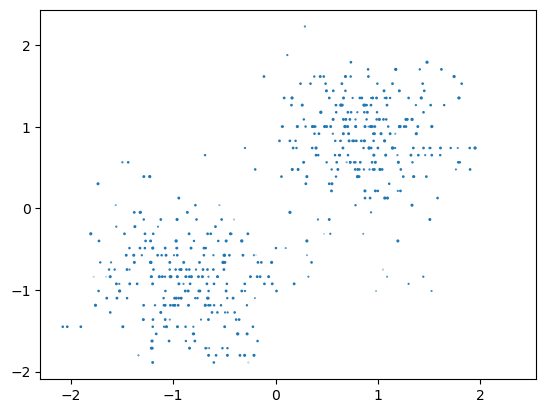

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
#用散点图展示income和age的数据
plt.scatter(df['z_income'],df['z_age'],df['z_days_since_purchase'])
plt.show()


## 使用k-means来进行分类

In [43]:
from sklearn import cluster
#这是k=4，将转化后的zscore数据进行分类
model = cluster.KMeans(n_clusters=4, random_state=10)
df['cluster'] = model.fit_predict(df[zcols])

In [44]:
df.head()

,income,age,days_since_purchase,z_income,z_age,z_days_since_purchase,cluster
0,56432,31,492,-0.606833,-0.748848,0.818321,1
1,137580,38,551,1.505879,-0.135469,1.349109,3
2,68285,59,304,-0.298237,1.704668,-0.873001,2
3,93617,51,507,0.361289,1.003663,0.953267,3
4,113441,54,509,0.877413,1.266540,0.971260,3


## 调用PCA，将三维数据降维至二维，计算两个principal component

In [101]:
from sklearn import decomposition

#调用PCA函数，从3维降到2维，n_components=2
pca = decomposition.PCA(n_components=2)


#将三维数据通过PCA降维到2维后，存入pc1和pc2
#pca.fit_transform(df[zcols]) 获取到一个ndarray类型的多维数组
#*表示解压,可以将一个序列解压为多个参数，传递给 zip() 函数,zip将多个可迭代对象作为参数，将每个可迭代对象对应的元素组合成一个元组
#这里zip后是包含两个元素，每个元素是一个1000的数组，将其赋值给pc1和pc2
df['pc1'], df['pc2'] = zip(*pca.fit_transform(df[zcols]))
df.head()

,income,age,days_since_purchase,z_income,z_age,z_days_since_purchase,cluster,pc1,pc2
0,56432,31,492,-0.606833,-0.748848,0.818321,1,-0.146251,0.208657
1,137580,38,551,1.505879,-0.135469,1.349109,3,-2.017272,0.188518
2,68285,59,304,-0.298237,1.704668,-0.873001,2,0.815283,-1.339297
3,93617,51,507,0.361289,1.003663,0.953267,3,-0.938956,-1.076085
4,113441,54,509,0.877413,1.266540,0.971260,3,-1.317778,-1.146315


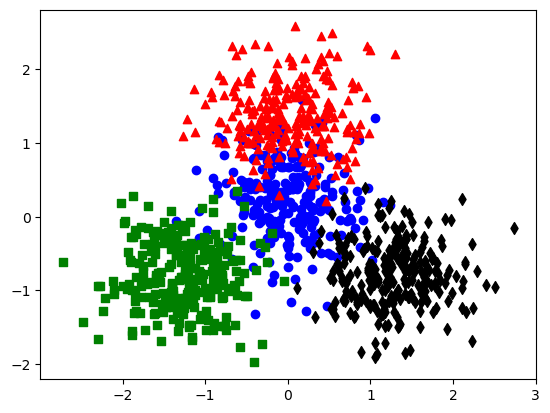

In [102]:
#通过matplotlib，显示降维后的数据分布，横轴pc1，纵轴pc2
import matplotlib.pyplot as plt
%matplotlib inline

colors = ['r', 'b', 'k', 'g']
markers = ['^', 'o', 'd', 's']

for c in df['cluster'].unique():
    d = df[df['cluster'] == c]
    plt.scatter(d['pc1'], d['pc2'], marker=markers[c], color=colors[c])

plt.show()

### 基于上述散点图分布情况，查看overlap部分

In [8]:
#循环每个分组0，1，2，3
for cluster in df['cluster'].unique():
    print("Cluster: " + str(cluster))
    for col in ['income', 'age', 'days_since_purchase']:
        #输出当前分组income,age,days_since_purchase的数据的平均值，并保留两位小数
        print(col + ": {:.2f}".format(df.loc[df['cluster'] == cluster, col].mean()))

Cluster: 1
income: 46153.20
age: 29.34
days_since_purchase: 498.19
Cluster: 3
income: 113118.22
age: 49.77
days_since_purchase: 502.58
Cluster: 2
income: 45002.10
age: 49.49
days_since_purchase: 299.66
Cluster: 0
income: 114704.12
age: 29.34
days_since_purchase: 302.92


In [104]:
for cluster in df['cluster'].unique():
    print("Cluster: " + str(cluster))
    for col in ['income', 'age', 'days_since_purchase']:
        #输出当前分组income,age,days_since_purchase的数据的平均值，并保留两位小数
        print(df.loc[df['cluster'] == cluster, col])

Cluster: 1
0      56432
6      72481
7      34577
8      37387
9      37886
       ...  
975    47511
983    54018
984    62879
986    54532
994    26829
Name: income, Length: 249, dtype: int64
0      31
6      33
7      26
8      30
9      26
       ..
975    20
983    29
984    36
986    26
994    32
Name: age, Length: 249, dtype: int64
0      492
6      402
7      450
8      463
9      480
      ... 
975    546
983    509
984    579
986    450
994    551
Name: days_since_purchase, Length: 249, dtype: int64
Cluster: 3
1      137580
3       93617
4      113441
5      100871
22     123577
        ...  
989    148518
992    104604
993    125429
995     98814
999    116123
Name: income, Length: 252, dtype: int64
1      38
3      51
4      54
5      43
22     57
       ..
989    55
992    57
993    47
995    56
999    55
Name: age, Length: 252, dtype: int64
1      551
3      507
4      509
5      552
22     510
      ... 
989    515
992    511
993    428
995    552
999    546
Name: days_s